In [48]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.dynamicBN as gdyn                                                               

In [49]:
twodbn=gum.BayesNet()
a0,b0,c0,at,bt,ct=[twodbn.add(gum.LabelizedVariable(s,s,6))
                  for s in ["a0","b0","c0","at","bt","ct"]]
d0,dt=[twodbn.add(gum.LabelizedVariable(s,s,3))
      for s in ["d0","dt"]]

twodbn.addArc(a0,b0)

twodbn.addArc(c0,d0)
twodbn.addArc(c0,at)

twodbn.addArc(a0,at)
twodbn.addArc(a0,bt)
twodbn.addArc(a0,dt)
twodbn.addArc(b0,bt)
twodbn.addArc(c0,ct)
twodbn.addArc(d0,ct)
twodbn.addArc(d0,dt)
twodbn.addArc(at,ct)
twodbn.generateCPTs()

z = gum.LabelizedVariable("zdw","z",6)
x = gum.LabelizedVariable("xdw","x",6)
z.name()
type(z)
a = twodbn.add(z)
b = twodbn.add(x)
# twodbn.removeArc(a,b)
twodbn.eraseArc(a0,dt)
twodbn.addArc(a,b)
twodbn.arcs()

twodbn.erase(a0)

twodbn.arcs()
# twodbn.variable(1)
# twodbn.variableFromName("A")
# twodbn.idFromName("A")

twodbn

(pyAgrum.BayesNet@0x11db09a00) BN{nodes: 9, arcs: 8, domainSize: 10^6.4013, dim: 663, mem: 6Ko 264o}

In [50]:
%load_ext autoreload
%autoreload 2
from DynamicBayesNet import DynamicBayesNet
from notebook import showTimeSlices
from notebook import unrollKTBN, unroll_ktbn
import pyAgrum.lib.dynamicBN as gdyn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


{'A', 'B'}
{'A', 'B', 'C'}


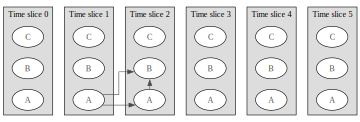

In [51]:
dBN = DynamicBayesNet(6)

a = gum.LabelizedVariable("A","A",2)
b = gum.LabelizedVariable("B","B",2)

dBN.add(a)
dBN.add(b)

print(dBN.variables)

dBN.idFromName(('A', 2))
dBN.addArc(("A", 1), ("A", 2))
dBN.addArc(("A", 1), ("B", 2))
dBN.addArc(("A", 2), ("B", 2))

dBN.arcs()

# dBN.eraseArc(("A", 1), ("A", 2))
dBN.arcs()

# dBN.erase("B")

dBN.arcs()

dBN.addFast('C{1|3|9}')
print(dBN.variables)

showTimeSlices(dBN)



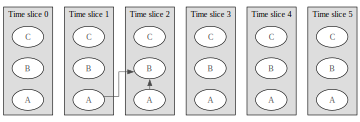

In [52]:
dBN.eraseArc(("A", 1), ("A", 2))
showTimeSlices(dBN)

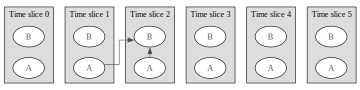

In [53]:
dBN.erase("C")
showTimeSlices(dBN)


{'A', 'B'}


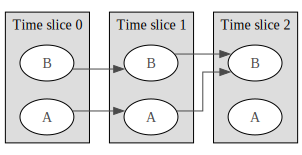

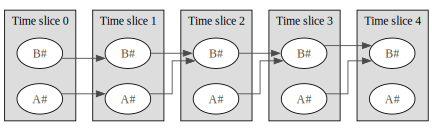


             ||  B#2              |
A#1   |B#1   ||0        |1        |
------|------||---------|---------|
0     |0     || 0.3333  | 0.7777  |
1     |0     || 0.6000  | 0.4000  |
0     |1     || 0.5000  | 0.5000  |
1     |1     || 0.2000  | 0.8000  |


             ||  B#3              |
B#2   |A#2   ||0        |1        |
------|------||---------|---------|
0     |0     || 0.3333  | 0.7777  |
1     |0     || 0.5000  | 0.5000  |
0     |1     || 0.6000  | 0.4000  |
1     |1     || 0.2000  | 0.8000  |


             ||  B#4              |
B#3   |A#3   ||0        |1        |
------|------||---------|---------|
0     |0     || 0.3333  | 0.7777  |
1     |0     || 0.5000  | 0.5000  |
0     |1     || 0.6000  | 0.4000  |
1     |1     || 0.2000  | 0.8000  |



In [72]:
dBN = DynamicBayesNet(3)

a = gum.LabelizedVariable("A","A",2)
b = gum.LabelizedVariable("B","B",2)

dBN.add(a)
dBN.add(b)

print(dBN.variables)

dBN.addArc(("A", 0), ("A", 1))
dBN.addArc(("B", 0), ("B", 1))
dBN.addArc(("A", 1), ("B", 2))
dBN.addArc(("B", 1), ("B", 2))

dBN.kTBN.cpt("B#2").fillWith([0.3333, 0.7777, 0.6, 0.4, 0.5, 0.5, 0.2, 0.8])

showTimeSlices(dBN)

res = unroll_ktbn(dBN, 5)
gdyn.showTimeSlices(res)
print(dBN.kTBN.cpt("B#2"))
print(res.cpt("B#3"))
print(res.cpt("B#4"))
